## Preprocessing images

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os

#function for cropping images
def cropImg(folder_path,output_folder):

    image_files = [f for f in os.listdir(folder_path)]
    left = 100
    top = 300
    right = 2125
    bottom = 1480
    for image in image_files:
            # Open the image file
            image_path = os.path.join(folder_path, image)
            img = Image.open(image_path)

            # Crop the image using the specified dimensions 
            cropped_img = img.crop((left, top, right, bottom))
            
            # Save the cropped image to the output folder
            output_path = os.path.join(output_folder, f"{image}")
            cropped_img.save(output_path)

In [3]:
folder_path1="Dataset/ECG Images of Myocardial Infarction Patients"
output_folder1="Dataset/CroppedMIPatient"
cropImg(folder_path1,output_folder1)

folder_path2="Dataset/ECG Images of Patient that have abnormal heartbeat"
output_folder2="Dataset/CroppedAbnormal"
cropImg(folder_path2,output_folder2)

folder_path3="Dataset/ECG Images of Patient that have History of MI"
output_folder3="Dataset/CroppedHMIPatient"
cropImg(folder_path3,output_folder3)

folder_path4="Dataset/Normal Person ECG Images"
output_folder4="Dataset/CroppedNormal"
cropImg(folder_path4,output_folder4)

## Data Augmentation

In [8]:
import cv2
import os
import numpy as np
import random

def rotate_image(image, angle):
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

def flip_image(image, flip_code):
    flipped_image = cv2.flip(image, flip_code)
    return flipped_image

def translate_image(image, tx, ty):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    return translated_image

def apply_augmentation(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get all ECG image files in the input folder
    ecg_files = [f for f in os.listdir(input_folder)]
    print("Number of images = ",len(ecg_files))
    
    for ecg_file in ecg_files:
        # Read the ECG image
        ecg_path = os.path.join(input_folder, ecg_file)
        ecg_image = cv2.imread(ecg_path)

        # Apply data augmentation
        
        rotated_image = rotate_image(ecg_image, angle=1)
        rotated_image1 = rotate_image(ecg_image, angle=-1)
        
        translation_x, translation_y = 1, 1
        translated_image = translate_image(ecg_image, translation_x, translation_y)
        translated_image1 = translate_image(rotated_image, translation_x, translation_y)
        
        # Save the augmented image
        output_path = os.path.join(output_folder, f"{ecg_file}")
        cv2.imwrite(output_path, ecg_image)
        
        output_path = os.path.join(output_folder, f"Trans{ecg_file}")
        cv2.imwrite(output_path, translated_image)
        
        output_path = os.path.join(output_folder, f"Rot{ecg_file}")
        cv2.imwrite(output_path, rotated_image)
        
        output_path = os.path.join(output_folder, f"tran{ecg_file}")
        cv2.imwrite(output_path, translated_image1)
        
        output_path = os.path.join(output_folder, f"ro{ecg_file}")
        cv2.imwrite(output_path, rotated_image1)

        if(output_folder=="Dataset/AugmentedHMIPatient"):
            translated_image2 = translate_image(rotated_image1, translation_x, translation_y)
            translation_x, translation_y = 1.5, 1.5
            translated_image3 = translate_image(ecg_image, translation_x, translation_y)
            
            output_path = os.path.join(output_folder, f"rotT{ecg_file}")
            cv2.imwrite(output_path, translated_image2)
            
            output_path = os.path.join(output_folder, f"Trt{ecg_file}")
            cv2.imwrite(output_path, translated_image3)
            
if __name__ == "__main__":
    # Specify the input folder and output folder
    input_folder="Dataset/CroppedMIPatient"
    output_folder="Dataset/AugmentedMIPatient"
    apply_augmentation(input_folder, output_folder)
    
    input_folder="Dataset/CroppedHMIPatient"
    output_folder="Dataset/AugmentedHMIPatient"
    apply_augmentation(input_folder, output_folder)
    
    input_folder="Dataset/CroppedNormal"
    output_folder="Dataset/AugmentedNormal"
    apply_augmentation(input_folder, output_folder)
    
    input_folder="Dataset/CroppedAbnormal"
    output_folder="Dataset/AugmentedAbnormal"
    apply_augmentation(input_folder, output_folder)


Number of images =  239
Number of images =  172
Number of images =  284
Number of images =  233


## Getting paths of images and storing in an array

In [2]:
normal_path= [
    os.path.join(os.getcwd(), "Dataset/AugmentedNormal", x)
    for x in os.listdir("Dataset/AugmentedNormal")
]
abnormal_path= [
    os.path.join(os.getcwd(), "Dataset/AugmentedAbnormal", x)
    for x in os.listdir("Dataset/AugmentedAbnormal")
]
Mi_path= [
    os.path.join(os.getcwd(), "Dataset/AugmentedMIPatient", x)
    for x in os.listdir("Dataset/AugmentedMIPatient")
]
Hmi_path= [
    os.path.join(os.getcwd(), "Dataset/AugmentedHMIPatient", x)
    for x in os.listdir("Dataset/AugmentedHMIPatient")
]

print("ECG of normal persons = " + str(len(normal_path)))
print("ECG of abnormal persons " + str(len(abnormal_path)))
print("ECG of MI persons = " + str(len(Mi_path)))
print("ECG of HMI persons = " + str(len(Hmi_path)))

ECG of normal persons = 1200
ECG of abnormal persons 1165
ECG of MI persons = 1195
ECG of HMI persons = 1140


## Creating a label array 

In [3]:
import numpy as np

abnormal_labels = np.array([0 for _ in range(len(abnormal_path))])
normal_labels = np.array([1 for _ in range(len(normal_path))])
mi_labels= np.array([2 for _ in range(len(Mi_path))])
hmi_labels= np.array([3 for _ in range(len(Hmi_path))])


## Sepeprating the image paths and labels

In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Combine image paths and labels into tuples
abnormal_data = list(zip(abnormal_path, abnormal_labels))
normal_data = list(zip(normal_path, normal_labels))
mi_data = list(zip(Mi_path, mi_labels))
hmi_data = list(zip(Hmi_path, hmi_labels))

data=[]
data.extend(abnormal_data)
data.extend(normal_data)
data.extend(mi_data)
data.extend(hmi_data)

X_paths = np.array([image_path for image_path, _ in data])
y = np.array([label for _, label in data])
    

## Proposed CNN Model

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.regularizers import l2

def build_cnn_model(input_shape=(227, 227, 3), num_classes=4):
    # Input layer which accepts ecg image with dimension (227,227,3)
    input_layer = layers.Input(shape=input_shape, name='input_layer')
    
    # This model consists of two branches -> stack branch and full branch
        
    # Stack branch
    stack_branch = input_layer
    
    #filters --> Number of filters
    for filters in [64, 128, 224]:
        #Convolution Layer
        stack_branch = layers.Conv2D(filters, (3, 3), activation=None, padding='same', strides=(2, 2),
                                     kernel_initializer=GlorotUniform(),
                                     bias_initializer='zeros',
                                     kernel_regularizer=l2(0.0001))(stack_branch)
        #Leaky Rectified Linear unit Layer
        stack_branch = layers.LeakyReLU(alpha=0.1)(stack_branch)
        #Batch Normalization layer
        stack_branch = layers.BatchNormalization(epsilon=0.00001,momentum = 0.9,gamma_regularizer=tf.keras.regularizers.l2(0.1))(stack_branch)
        # Max Pooling Layer
        stack_branch = layers.MaxPooling2D((6, 6), strides=(3, 3),padding='same')(stack_branch)

    
    # Full branch
    #Fully connected layer
    full_branch = layers.Flatten()(input_layer)
    full_branch = layers.Dense(16, kernel_initializer=GlorotUniform(),
                              bias_initializer='zeros',
                              kernel_regularizer=l2(0.0001))(full_branch)
    full_branch = layers.Reshape((1, 1, 16))(full_branch)
    full_branch = layers.LeakyReLU(alpha=0.1)(full_branch)
    full_branch = layers.BatchNormalization(epsilon=0.00001,momentum = 0.9,gamma_regularizer=tf.keras.regularizers.l2(0.1))(full_branch)
    full_branch = layers.Dropout(0.2)(full_branch)
    
    conv04 = layers.ZeroPadding2D(padding=(1, 1))(full_branch)
    conv04 = layers.Conv2D(32, (2, 2), strides=(1, 1), padding='valid', activation=None,
                           kernel_initializer=GlorotUniform(),
                           bias_initializer='zeros',
                           kernel_regularizer=l2(0.0001))(conv04)
    
    conv05 = layers.ZeroPadding2D(padding=(2, 2))(full_branch)
    conv05 = layers.Conv2D(64, (3, 3), strides=(2, 2), padding='valid',
                           kernel_initializer=GlorotUniform(),
                           bias_initializer='zeros',
                           kernel_regularizer=l2(0.0001))(conv05)
    
    conv04 = layers.LeakyReLU(alpha=0.1)(conv04)
    conv04 = layers.BatchNormalization(epsilon=0.00001,momentum = 0.9,gamma_regularizer=tf.keras.regularizers.l2(0.1))(conv04)
    
    conv05 = layers.LeakyReLU(alpha=0.1)(conv05)
    conv05 = layers.BatchNormalization(epsilon=0.00001,momentum = 0.9,gamma_regularizer=tf.keras.regularizers.l2(0.1))(conv05)
    
    #concatenate branches of conv04 and conv05
    full_branch = layers.Concatenate()([conv04, conv05])
    full_branch = layers.Dropout(0.2)(full_branch)
    
    # Concatenate branches of stack branch and full branch
    concatenated_branches = layers.Concatenate()([stack_branch, full_branch])
    concatenated_branches = layers.Dropout(0.2)(concatenated_branches)
    
    concatenated_branches = layers.Conv2D(256, (1, 1), activation=None, strides=(1, 1), padding='same',
                                          kernel_initializer=GlorotUniform(),
                                          bias_initializer='zeros',
                                          kernel_regularizer=l2(0.0001))(concatenated_branches)
    concatenated_branches = layers.LeakyReLU(alpha=0.1)(concatenated_branches)
    concatenated_branches = layers.BatchNormalization(epsilon=0.00001,momentum = 0.9,gamma_regularizer=tf.keras.regularizers.l2(0.1))(concatenated_branches)
    concatenated_branches = layers.Dropout(0.3)(concatenated_branches)
    
    concatenated_branches = layers.Flatten()(concatenated_branches)
    concatenated_branches = layers.Dense(512, kernel_initializer=GlorotUniform(),
                                         bias_initializer='zeros',
                                         kernel_regularizer=l2(0.0001))(concatenated_branches)
    
    concatenated_branches = layers.LeakyReLU(alpha=0.1)(concatenated_branches)
    concatenated_branches = layers.BatchNormalization(epsilon=0.00001,momentum = 0.9,gamma_regularizer=tf.keras.regularizers.l2(0.1))(concatenated_branches)
    concatenated_branches = layers.Dropout(0.3)(concatenated_branches)
    #Fully connected Layer 
    concatenated_branches = layers.Flatten()(concatenated_branches)
    concatenated_branches = layers.Dense(4, kernel_initializer=GlorotUniform(),
                                         bias_initializer='zeros',
                                         kernel_regularizer=l2(0.0001))(concatenated_branches)
    
    #output layer with softmax activation
    output_layer = layers.Dense(num_classes, activation='softmax')(concatenated_branches)

    # Model
    model = models.Model(inputs=input_layer, outputs=output_layer, name='custom_cnn_model')
    return model

# Building  the model
model = build_cnn_model()

# To display the summary of the model
model.summary()


Model: "custom_cnn_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 114, 114, 64)         1792      ['input_layer[0][0]']         
                                                                                                  
 flatten_3 (Flatten)         (None, 154587)               0         ['input_layer[0][0]']         
                                                                                                  
 leaky_re_lu_9 (LeakyReLU)   (None, 114, 114, 64)         0         ['conv2d_7[0][0]']            
                                                                                   

 leaky_re_lu_15 (LeakyReLU)  (None, 2, 2, 256)            0         ['conv2d_12[0][0]']           
                                                                                                  
 batch_normalization_15 (Ba  (None, 2, 2, 256)            1024      ['leaky_re_lu_15[0][0]']      
 tchNormalization)                                                                                
                                                                                                  
 dropout_8 (Dropout)         (None, 2, 2, 256)            0         ['batch_normalization_15[0][0]
                                                                    ']                            
                                                                                                  
 flatten_4 (Flatten)         (None, 1024)                 0         ['dropout_8[0][0]']           
                                                                                                  
 dense_5 (

## Training the model 

Epoch 1/16


29/29 [==============================] - 52s 1s/step - loss: 131.1311 - accuracy: 0.3351 - val_loss: 131.6645 - val_accuracy: 0.3245
Epoch 2/16
29/29 [==============================] - 33s 1s/step - loss: 129.8238 - accuracy: 0.5135 - val_loss: 133.5122 - val_accuracy: 0.2543
Epoch 3/16
29/29 [==============================] - 31s 1s/step - loss: 128.6601 - accuracy: 0.6691 - val_loss: 128.4536 - val_accuracy: 0.5915
Epoch 4/16
29/29 [==============================] - 30s 1s/step - loss: 127.6228 - accuracy: 0.8045 - val_loss: 128.2977 - val_accuracy: 0.5777
Epoch 5/16
29/29 [==============================] - 30s 1s/step - loss: 126.6940 - accuracy: 0.8849 - val_loss: 128.1804 - val_accuracy: 0.4713
Epoch 6/16
29/29 [==============================] - 34s 1s/step - loss: 125.8650 - accuracy: 0.9287 - val_loss: 125.5522 - val_accuracy: 0.9085
Epoch 7/16
29/29 [==============================] - 31s 1s/step - loss: 125.0704 - accuracy: 0.9543 - val_loss: 124.6928 - val_accurac

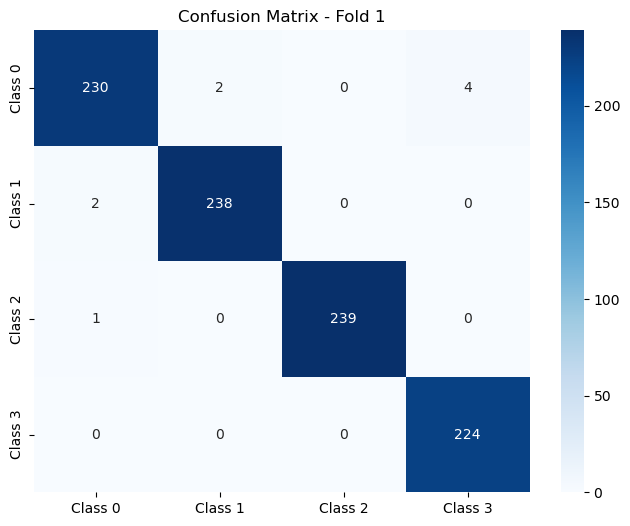

Mean Precision: 0.9905111040990503 +/- 0.0
Mean Recall: 0.9904255319148936 +/- 0.0
Mean F1 Score: 0.9904384355047654 +/- 0.0
Mean Training Time: 528.3980121612549 +/- 0.0 seconds
Mean Testing Time: 10.063470602035522 +/- 0.0 seconds
Epoch 1/16
29/29 [==============================] - 57s 1s/step - loss: 130.8670 - accuracy: 0.3782 - val_loss: 131.0110 - val_accuracy: 0.3426
Epoch 2/16
29/29 [==============================] - 34s 1s/step - loss: 129.5663 - accuracy: 0.5903 - val_loss: 131.1775 - val_accuracy: 0.2872
Epoch 3/16
29/29 [==============================] - 35s 1s/step - loss: 128.4905 - accuracy: 0.7459 - val_loss: 128.0269 - val_accuracy: 0.7936
Epoch 4/16
29/29 [==============================] - 40s 1s/step - loss: 127.5819 - accuracy: 0.8227 - val_loss: 127.3349 - val_accuracy: 0.7234
Epoch 5/16
29/29 [==============================] - 36s 1s/step - loss: 126.7083 - accuracy: 0.8868 - val_loss: 136.6073 - val_accuracy: 0.2660
Epoch 6/16
29/29 [=============================

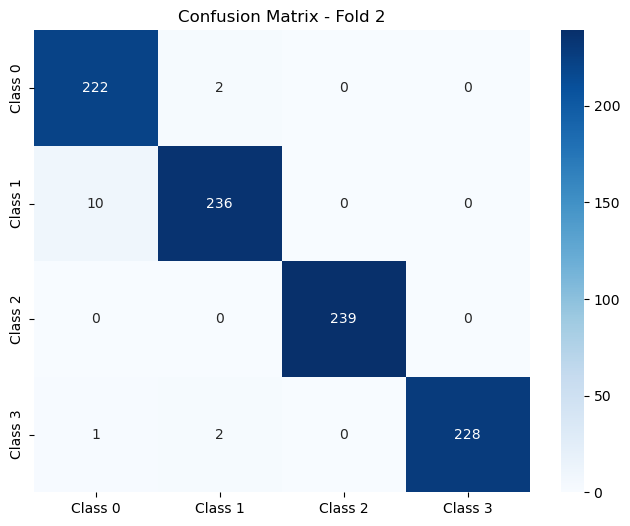

Mean Precision: 0.9873845447809764 +/- 0.0031265593180739293
Mean Recall: 0.9872340425531915 +/- 0.0031914893617021045
Mean F1 Score: 0.9872235873917017 +/- 0.003214848113063662
Mean Training Time: 573.8526054620743 +/- 45.4545933008194 seconds
Mean Testing Time: 12.091838121414185 +/- 2.028367519378662 seconds
Epoch 1/16
29/29 [==============================] - 50s 1s/step - loss: 131.1275 - accuracy: 0.3683 - val_loss: 132.4267 - val_accuracy: 0.3309
Epoch 2/16
29/29 [==============================] - 38s 1s/step - loss: 129.7888 - accuracy: 0.5705 - val_loss: 131.3300 - val_accuracy: 0.3872
Epoch 3/16
29/29 [==============================] - 37s 1s/step - loss: 128.6200 - accuracy: 0.7170 - val_loss: 128.1463 - val_accuracy: 0.7426
Epoch 4/16
29/29 [==============================] - 33s 1s/step - loss: 127.5857 - accuracy: 0.8268 - val_loss: 128.5744 - val_accuracy: 0.5819
Epoch 5/16
29/29 [==============================] - 36s 1s/step - loss: 126.6429 - accuracy: 0.9102 - val_loss:

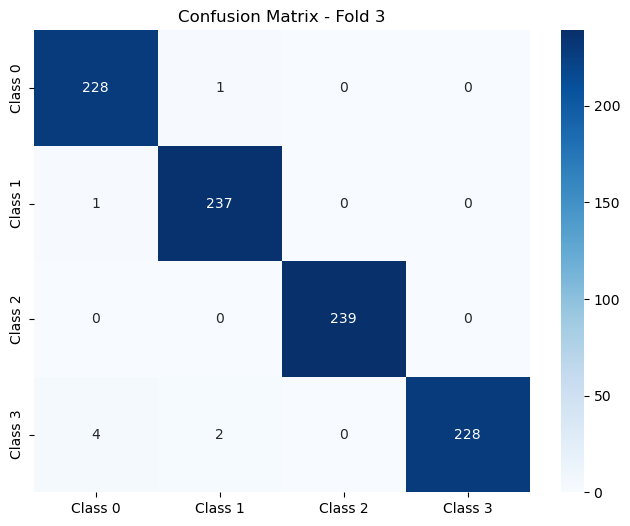

Mean Precision: 0.9887981984864642 +/- 0.003242491178764992
Mean Recall: 0.9886524822695035 +/- 0.003288517196984279
Mean F1 Score: 0.9886471500384927 +/- 0.0033080548381271445
Mean Training Time: 571.1794356505076 +/- 37.30556314784977 seconds
Mean Testing Time: 11.160276889801025 +/- 2.116237821922704 seconds
Epoch 1/16
29/29 [==============================] - 55s 1s/step - loss: 131.0576 - accuracy: 0.3645 - val_loss: 139.5360 - val_accuracy: 0.2553
Epoch 2/16
29/29 [==============================] - 32s 1s/step - loss: 129.6926 - accuracy: 0.5732 - val_loss: 132.0364 - val_accuracy: 0.4777
Epoch 3/16
29/29 [==============================] - 33s 1s/step - loss: 128.5229 - accuracy: 0.7434 - val_loss: 128.7553 - val_accuracy: 0.6074
Epoch 4/16
29/29 [==============================] - 29s 984ms/step - loss: 127.5085 - accuracy: 0.8535 - val_loss: 128.6402 - val_accuracy: 0.6074
Epoch 5/16
29/29 [==============================] - 31s 1s/step - loss: 126.5999 - accuracy: 0.9262 - val_lo

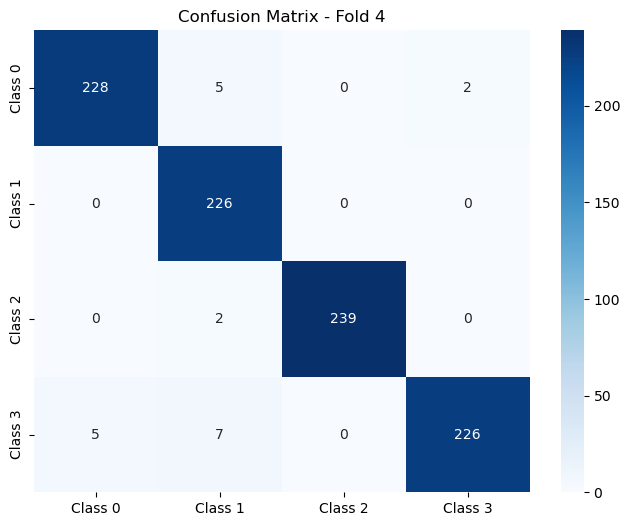

Mean Precision: 0.9861678971784468 +/- 0.005351706895575549
Mean Recall: 0.9859042553191489 +/- 0.005546982344312259
Mean F1 Score: 0.9858922034478583 +/- 0.005565663685562302
Mean Training Time: 562.827408850193 +/- 35.398415732249575 seconds
Mean Testing Time: 10.463400483131409 +/- 2.1944833259153245 seconds
Epoch 1/16
29/29 [==============================] - 60s 1s/step - loss: 130.9600 - accuracy: 0.3629 - val_loss: 133.3634 - val_accuracy: 0.2989
Epoch 2/16
29/29 [==============================] - 29s 1s/step - loss: 129.7932 - accuracy: 0.4942 - val_loss: 131.6979 - val_accuracy: 0.3319
Epoch 3/16
29/29 [==============================] - 33s 1s/step - loss: 128.7199 - accuracy: 0.6333 - val_loss: 128.7477 - val_accuracy: 0.4351
Epoch 4/16
29/29 [==============================] - 31s 1s/step - loss: 127.7208 - accuracy: 0.7563 - val_loss: 128.9426 - val_accuracy: 0.4447
Epoch 5/16
29/29 [==============================] - 31s 1s/step - loss: 126.7769 - accuracy: 0.8618 - val_loss:

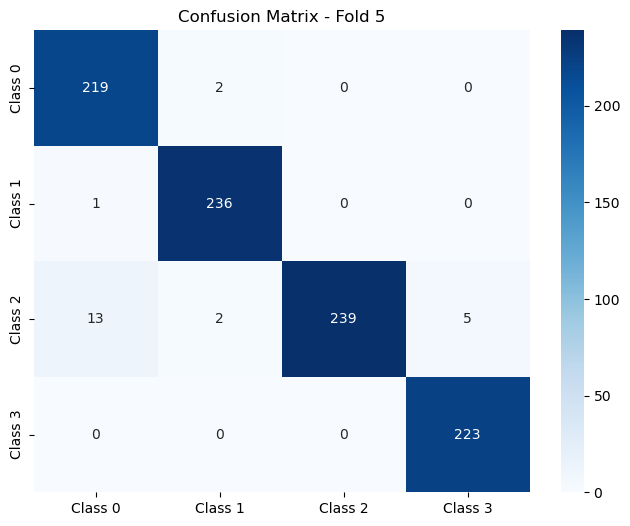

Mean Precision: 0.9843434977494565 +/- 0.006018832649519426
Mean Recall: 0.9838297872340427 +/- 0.006467525171732178
Mean F1 Score: 0.9838513613166944 +/- 0.006437502328229828
Mean Training Time: 550.5898941516876 +/- 40.01831247150587 seconds
Mean Testing Time: 9.62056736946106 +/- 2.587291302535014 seconds


In [15]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

sumAccuracy=0

# Initialize lists to store metrics and times for each fold
precision_scores = []
recall_scores = []
f1_scores = []
training_times = []
testing_times = []

# Initialising batch size and epochs accordingly
batch_size = 128
epochs = 16

# For Performing 5-fold cross-validation
X_paths = np.array([image_path for image_path, _ in data])
y = np.array([label for _, label in data])

# Initialize KFold with 5 folds
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

# Loop through the folds
for fold_idx, (train_index, test_index) in enumerate(kf.split(X_paths, y)):
    # Create train and test sets for this fold
    X_train_paths, X_test_paths = X_paths[train_index], X_paths[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Load and preprocess images by resizing
    X_train = np.array([img_to_array(load_img(img_path, target_size=(227, 227,3))) for img_path in X_train_paths])
    X_test = np.array([img_to_array(load_img(img_path, target_size=(227, 227,3))) for img_path in X_test_paths])

    # Normalize pixel values to be between 0 and 1
    X_train /= 255.0
    X_test /= 255.0
    
    #Convert the labels to categorical labels
    y_train_one_hot = to_categorical(y_train)
    y_test_one_hot = to_categorical(y_test)
    
    #Model object created
    model = build_cnn_model()
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Record training start time
    start_time_train = time.time()
   
    # Train the model for this fold
    model.fit(X_train,y_train_one_hot, validation_data=(X_test, y_test_one_hot),batch_size=batch_size, epochs=epochs,steps_per_epoch=29)
    
    # Record training end time
    end_time_train = time.time()
   
    # Record testing start time
    start_time_test = time.time()
    
    # Evaluate the model on the test set for each fold
    results = model.evaluate(X_test, y_test_one_hot)
    
    # Record testing end time
    end_time_test = time.time()
   
    # Calculate precision, recall, and F1 score
    y_pred = model.predict(X_test)
    y_pred1 = np.argmax(y_pred,axis=1)
    precision = precision_score(y_test, y_pred1, average='weighted')
    recall = recall_score(y_test, y_pred1, average='weighted')
    f1 = f1_score(y_test, y_pred1, average='weighted')
   
    # Append metrics and times to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    training_times.append(end_time_train - start_time_train)
    testing_times.append(end_time_test - start_time_test)
    
    print(f"Fold {fold_idx + 1}, Test Loss: {results[0]}, Test Accuracy: {results[1]}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
    sumAccuracy = sumAccuracy + results[1]
    
    # Convert one-hot encoded predictions back to categorical labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    # Convert one-hot encoded true labels back to categorical labels
    y_true_labels = np.argmax(y_test_one_hot, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_pred_labels, y_true_labels)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
    plt.title(f'Confusion Matrix - Fold {fold_idx + 1}')
    plt.show()
    
    # Calculate mean and standard deviation of metrics and times
    mean_precision = np.mean(precision_scores)
    std_precision = np.std(precision_scores)

    mean_recall = np.mean(recall_scores)
    std_recall = np.std(recall_scores)

    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)

    mean_training_time = np.mean(training_times)
    std_training_time = np.std(training_times)

    mean_testing_time = np.mean(testing_times)
    std_testing_time = np.std(testing_times)

    print(f"Mean Precision: {mean_precision} +/- {std_precision}")
    print(f"Mean Recall: {mean_recall} +/- {std_recall}")
    print(f"Mean F1 Score: {mean_f1} +/- {std_f1}")
    print(f"Mean Training Time: {mean_training_time} +/- {std_training_time} seconds")
    print(f"Mean Testing Time: {mean_testing_time} +/- {std_testing_time} seconds")
    
avgAccuracy= sumAccuracy/5
print("Average accuracy of cnn model = ",avgAccuracy)


Epoch 1/16
29/29 [==============================] - 54s 1s/step - loss: 131.1388 - accuracy: 0.3397 - val_loss: 137.0897 - val_accuracy: 0.2426
Epoch 2/16
29/29 [==============================] - 34s 1s/step - loss: 129.8343 - accuracy: 0.5311 - val_loss: 132.4000 - val_accuracy: 0.2532
Epoch 3/16
29/29 [==============================] - 32s 1s/step - loss: 128.6827 - accuracy: 0.6872 - val_loss: 128.3963 - val_accuracy: 0.6202
Epoch 4/16
29/29 [==============================] - 32s 1s/step - loss: 127.5855 - accuracy: 0.8373 - val_loss: 127.8646 - val_accuracy: 0.6138
Epoch 5/16
29/29 [==============================] - 33s 1s/step - loss: 126.6381 - accuracy: 0.9210 - val_loss: 126.7353 - val_accuracy: 0.6947
Epoch 6/16
29/29 [==============================] - 34s 1s/step - loss: 125.8053 - accuracy: 0.9570 - val_loss: 125.4432 - val_accuracy: 0.9532
Epoch 7/16
29/29 [==============================] - 33s 1s/step - loss: 125.0346 - accuracy: 0.9716 - val_loss: 124.7679 - val_accuracy:

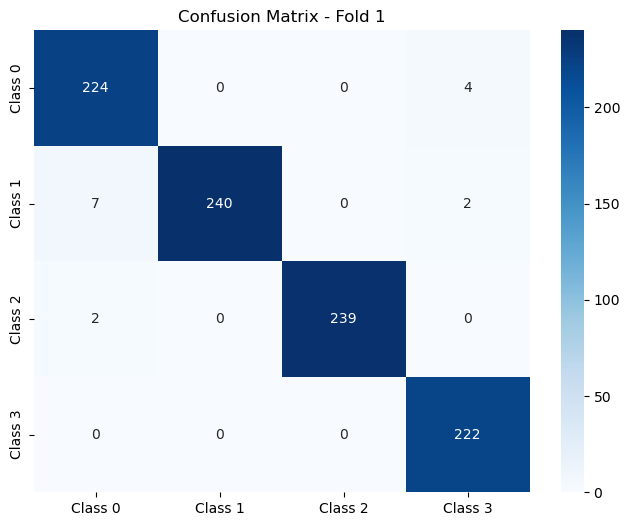

Mean Precision: 0.9843129568265395 +/- 0.0
Mean Recall: 0.9840425531914894 +/- 0.0
Mean F1 Score: 0.9840175423799521 +/- 0.0
Mean Training Time: 540.178475856781 +/- 0.0 seconds
Mean Testing Time: 10.177921533584595 +/- 0.0 seconds
Epoch 1/16
29/29 [==============================] - 58s 1s/step - loss: 131.0274 - accuracy: 0.3564 - val_loss: 136.7753 - val_accuracy: 0.2426
Epoch 2/16
29/29 [==============================] - 33s 1s/step - loss: 129.7201 - accuracy: 0.5578 - val_loss: 131.7929 - val_accuracy: 0.4181
Epoch 3/16
29/29 [==============================] - 36s 1s/step - loss: 128.5742 - accuracy: 0.7073 - val_loss: 128.8501 - val_accuracy: 0.5096
Epoch 4/16
29/29 [==============================] - 35s 1s/step - loss: 127.5683 - accuracy: 0.8290 - val_loss: 127.1252 - val_accuracy: 0.9106
Epoch 5/16
29/29 [==============================] - 32s 1s/step - loss: 126.6669 - accuracy: 0.9083 - val_loss: 126.8920 - val_accuracy: 0.6851
Epoch 6/16
29/29 [==============================

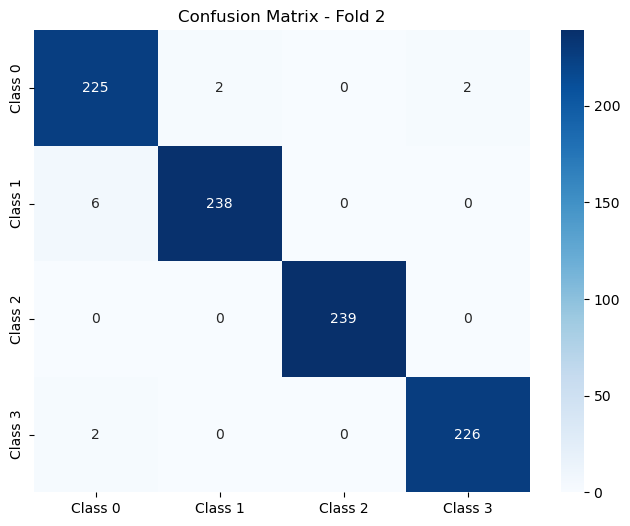

Mean Precision: 0.9857886548282189 +/- 0.0014756980016794041
Mean Recall: 0.9856382978723404 +/- 0.0015957446808510523
Mean F1 Score: 0.9856157444874716 +/- 0.0015982021075194863
Mean Training Time: 570.4779509305954 +/- 30.299475073814392 seconds
Mean Testing Time: 11.527345657348633 +/- 1.349424123764038 seconds
Epoch 1/16
29/29 [==============================] - 65s 1s/step - loss: 130.9668 - accuracy: 0.3467 - val_loss: 135.6209 - val_accuracy: 0.2426
Epoch 2/16
29/29 [==============================] - 40s 1s/step - loss: 129.7838 - accuracy: 0.4964 - val_loss: 136.9337 - val_accuracy: 0.2426
Epoch 3/16
29/29 [==============================] - 48s 2s/step - loss: 128.6949 - accuracy: 0.6583 - val_loss: 129.5427 - val_accuracy: 0.3021
Epoch 4/16
29/29 [==============================] - 48s 2s/step - loss: 127.7050 - accuracy: 0.7687 - val_loss: 127.7192 - val_accuracy: 0.5883
Epoch 5/16
29/29 [==============================] - 45s 2s/step - loss: 126.8080 - accuracy: 0.8643 - val_lo

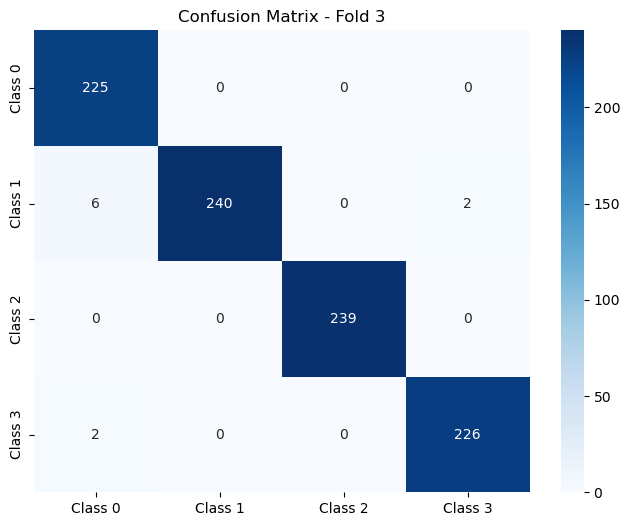

Mean Precision: 0.9870711828344612 +/- 0.0021775091048486126
Mean Recall: 0.9868794326241135 +/- 0.0021859624124003583
Mean F1 Score: 0.9868628739047182 +/- 0.002193968296119331
Mean Training Time: 605.643120209376 +/- 55.54473020887213 seconds
Mean Testing Time: 11.3641250928243 +/- 1.1257200136941299 seconds
Epoch 1/16
29/29 [==============================] - 67s 1s/step - loss: 131.1028 - accuracy: 0.3548 - val_loss: 133.3912 - val_accuracy: 0.2830
Epoch 2/16
29/29 [==============================] - 40s 1s/step - loss: 129.7085 - accuracy: 0.5578 - val_loss: 132.8862 - val_accuracy: 0.3309
Epoch 3/16
29/29 [==============================] - 34s 1s/step - loss: 128.5849 - accuracy: 0.7112 - val_loss: 129.9980 - val_accuracy: 0.3787
Epoch 4/16
29/29 [==============================] - 33s 1s/step - loss: 127.6061 - accuracy: 0.8086 - val_loss: 127.0838 - val_accuracy: 0.8979
Epoch 5/16
29/29 [==============================] - 34s 1s/step - loss: 126.6913 - accuracy: 0.8937 - val_loss: 

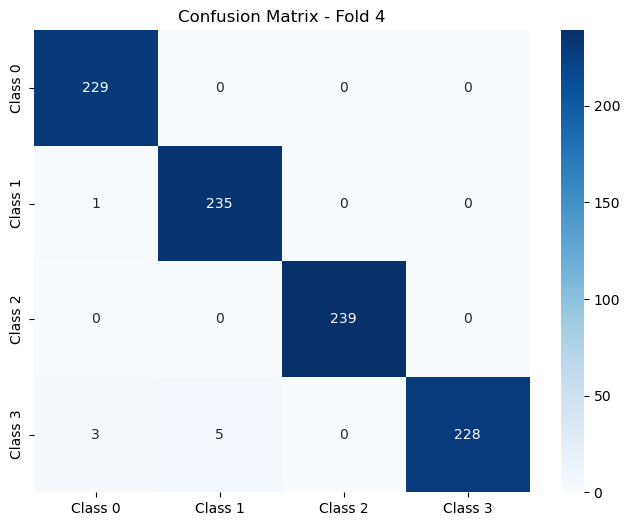

Mean Precision: 0.9879773864046053 +/- 0.002453522805661292
Mean Recall: 0.9877659574468085 +/- 0.0024375402632743773
Mean F1 Score: 0.9877605701668077 +/- 0.0024551371448844174
Mean Training Time: 598.8362214565277 +/- 49.52690584295447 seconds
Mean Testing Time: 11.491548359394073 +/- 0.9995720226744886 seconds
Epoch 1/16
29/29 [==============================] - 91s 1s/step - loss: 131.0225 - accuracy: 0.3588 - val_loss: 135.8085 - val_accuracy: 0.2543
Epoch 2/16
29/29 [==============================] - 29s 1s/step - loss: 129.6903 - accuracy: 0.5567 - val_loss: 130.7060 - val_accuracy: 0.3872
Epoch 3/16
29/29 [==============================] - 26s 892ms/step - loss: 128.5572 - accuracy: 0.7371 - val_loss: 128.0058 - val_accuracy: 0.8000
Epoch 4/16
29/29 [==============================] - 27s 925ms/step - loss: 127.5167 - accuracy: 0.8516 - val_loss: 131.9691 - val_accuracy: 0.3755
Epoch 5/16
29/29 [==============================] - 24s 843ms/step - loss: 126.5993 - accuracy: 0.9301 

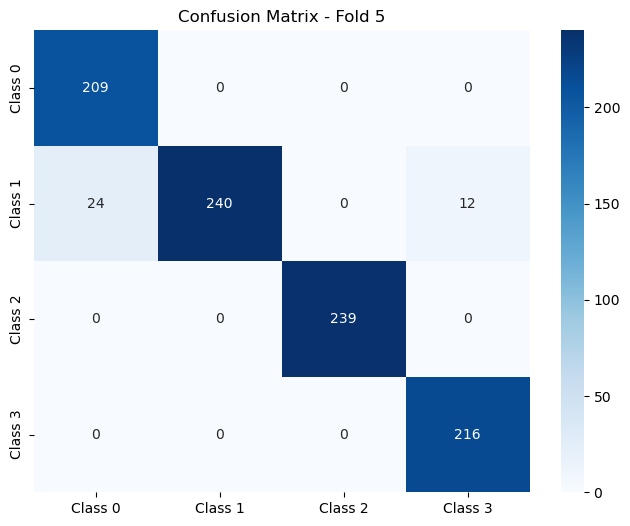

Mean Precision: 0.9837214095862189 +/- 0.008790288621023185
Mean Recall: 0.9825531914893617 +/- 0.01065105617939051
Mean F1 Score: 0.9826429387038544 +/- 0.010468178728059097
Mean Training Time: 574.5734807491302 +/- 65.70429109608527 seconds
Mean Testing Time: 10.625044298171996 +/- 1.950033983106003 seconds


C:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Average accuracy of cnn model =  0.9825531840324402
Highest nb accuracy =  0.9936170212765958


In [34]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

SumAccuracy=0
maxNB=0
maxSVM=0
maxKNN=0
maxDT=0
maxRF=0

# Initialize lists to store metrics and times for each fold
precision_scores = []
recall_scores = []
f1_scores = []
training_times = []
testing_times = []

# Initializing batch size and epochs accordingly
batch_size = 128
epochs = 16


best_valLoss=float('inf')
best_model=None

# For Performing 5-fold cross-validation
X_paths = np.array([image_path for image_path, _ in data])
y = np.array([label for _, label in data])

# Initialize KFold with 5 folds
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

# Loop through the folds
for fold_idx, (train_index, test_index) in enumerate(kf.split(X_paths, y)):
    # Create train and test sets for this fold
    X_train_paths, X_test_paths = X_paths[train_index], X_paths[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Load and preprocess images by resizing
    X_train = np.array([img_to_array(load_img(img_path, target_size=(227, 227,3))) for img_path in X_train_paths])
    X_test = np.array([img_to_array(load_img(img_path, target_size=(227, 227,3))) for img_path in X_test_paths])

    # Normalize pixel values to be between 0 and 1
    X_train /= 255.0
    X_test /= 255.0
    
    # Covert labels to categorical labels
    y_train_one_hot = to_categorical(y_train)
    y_test_one_hot = to_categorical(y_test)
    
    #print(y_train_one_hot)
    model = build_cnn_model()
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Record training start time
    start_time_train = time.time()
   
    # Training the model for this fold
    model.fit(X_train,y_train_one_hot, validation_data=(X_test, y_test_one_hot),batch_size=batch_size, epochs=epochs,steps_per_epoch=29)
    
    # Record training end time
    end_time_train = time.time()
   
    # Record testing start time
    start_time_test = time.time()
    
    # Evaluate the model on the test set for each fold
    results = model.evaluate(X_test, y_test_one_hot)
    validLoss= results[0]
    
    # Record testing end time
    end_time_test = time.time()
   
    if(validLoss<best_valLoss):
        best_valLoss = validLoss
        best_model=model
    
    # Calculate precision, recall, and F1 score
    y_pred = model.predict(X_test)
    y_pred1 = np.argmax(y_pred,axis=1)
    precision = precision_score(y_test, y_pred1, average='weighted')
    recall = recall_score(y_test, y_pred1, average='weighted')
    f1 = f1_score(y_test, y_pred1, average='weighted')
   
    # Extract features from the CNN model
    X_train_features = model.predict(X_train)
    #X_test_features = model.predict(X_test)

    # Flatten the features
    X_train_features_flatten = X_train_features.reshape(X_train_features.shape[0], -1)
    X_test_features_flatten = y_pred.reshape(y_pred.shape[0], -1)

    # Train Naive Bayes classifier
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_features_flatten, y_train)

    # Train SVM classifier
    svm_classifier = SVC()
    svm_classifier.fit(X_train_features_flatten, y_train)
    
    # Train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=4) 
    knn_classifier.fit(X_train_features_flatten, y_train)
    
    # Train the decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train_features_flatten, y_train)
    
    # Train Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(X_train_features_flatten, y_train)
        
    # Evaluate SVM classifier
    accuracy_svm = svm_classifier.score(X_test_features_flatten, y_test)
    print("SVM Classifier Accuracy:", accuracy_svm)
    if(accuracy_svm>maxSVM):
        maxSVM=accuracy_svm
        
    # Evaluate Naive Bayes classifier
    accuracy = nb_classifier.score(X_test_features_flatten, y_test)
    print("Naive Bayes Classifier Accuracy:", accuracy)
    if(accuracy>maxNB):
        maxNB=accuracy
        
    # Evaluate KNN classifier
    accuracy_knn = knn_classifier.score(X_test_features_flatten, y_test)
    print("K Nearest Neighbour Accuracy:", accuracy_knn)
    if(accuracy_knn>maxKNN):
        maxKNN=accuracy_knn
    
    # Evaluate DT classifier
    accuracy_dt = clf.score(X_test_features_flatten, y_test)
    print("Decision Tree Accuracy:", accuracy_dt)
    if(accuracy_dt>maxDT):
        maxDT=accuracy_dt
    
    # Evaluate RF classifier
    accuracy_rf = rf_classifier.score(X_test_features_flatten, y_test)
    print("Random Forest Accuracy:", accuracy_rf)
    if(accuracy_rf>maxRF):
        maxRF=accuracy_rf
        
    # Append metrics and times to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    training_times.append(end_time_train - start_time_train)
    testing_times.append(end_time_test - start_time_test)
    
    print(f"Fold {fold_idx + 1}, Test Loss: {results[0]}, Test Accuracy: {results[1]}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
    SumAccuracy = SumAccuracy + results[1]
    
    # Convert one-hot encoded predictions back to categorical labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    # Convert one-hot encoded true labels back to categorical labels
    y_true_labels = np.argmax(y_test_one_hot, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_pred_labels, y_true_labels)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
    plt.title(f'Confusion Matrix - Fold {fold_idx + 1}')
    plt.show()
    
    # Calculate mean and standard deviation of metrics and times
    mean_precision = np.mean(precision_scores)
    std_precision = np.std(precision_scores)

    mean_recall = np.mean(recall_scores)
    std_recall = np.std(recall_scores)

    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)

    mean_training_time = np.mean(training_times)
    std_training_time = np.std(training_times)

    mean_testing_time = np.mean(testing_times)
    std_testing_time = np.std(testing_times)

    print(f"Mean Precision: {mean_precision} +/- {std_precision}")
    print(f"Mean Recall: {mean_recall} +/- {std_recall}")
    print(f"Mean F1 Score: {mean_f1} +/- {std_f1}")
    print(f"Mean Training Time: {mean_training_time} +/- {std_training_time} seconds")
    print(f"Mean Testing Time: {mean_testing_time} +/- {std_testing_time} seconds")
    
avgAccuracy= SumAccuracy/5

# Saving the model as .h5 file
best_model.save("ECG_Prediction_Model.h5")

print("Average accuracy of cnn model = ",avgAccuracy)
print("Highest nb accuracy = ",maxNB)
# print("Highest svm accuracy = ",maxSVM)
# print("Highest knn  accuracy = ",maxKNN)
# print("Highest rf accuracy = ",maxRF)
# print("Highest dt accuracy= ",maxDT)


## Checking the saved model on individual images

In [35]:
from tensorflow.keras.models import load_model
import cv2

In [36]:
saved_path="ECG_Prediction_Model.h5"
model=load_model(saved_path)
img = cv2.imread("PMI(2).jpg")
img=cv2.resize(img,(227,227))

img=img/255.0
img=np.expand_dims(img,axis=0)
predict=model.predict(img)
pc=np.argmax(predict,axis=1)
print("predicted class = ",pc)

1/1 [==============================] - 0s 330ms/step
predicted class =  [3]


In [37]:

saved_path="ECG_Prediction_Model.h5"
model=load_model(saved_path)

img = cv2.imread("MI(1).jpg")

img=cv2.resize(img,(227,227))

img=img/255.0
img=np.expand_dims(img,axis=0)
predict=model.predict(img)
pc=np.argmax(predict,axis=1)
print("predicted class = ",pc)
img = cv2.imread("HB(1).jpg")

1/1 [==============================] - 0s 219ms/step
predicted class =  [2]


In [38]:
saved_path="ECG_Prediction_Model.h5"
model=load_model(saved_path)

img = cv2.imread("Normal(2).jpg")

img=cv2.resize(img,(227,227))

img=img/255.0
img=np.expand_dims(img,axis=0)
predict=model.predict(img)
pc=np.argmax(predict,axis=1)
print("predicted class = ",pc)

1/1 [==============================] - 0s 250ms/step
predicted class =  [1]


In [39]:
saved_path="ECG_Prediction_Model.h5"
model=load_model(saved_path)

img = cv2.imread("HB(1).jpg")
img=cv2.resize(img,(227,227))

img=img/255.0
img=np.expand_dims(img,axis=0)
predict=model.predict(img)
pc=np.argmax(predict,axis=1)
print("predicted class = ",pc)

1/1 [==============================] - 0s 196ms/step
predicted class =  [0]
